In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv("Data/Cleaned_data.csv")  

# Showing number of rows per Apartment & House

In [3]:
df_apt = df.loc[df['type'].isin(['house'])]
print(df_apt['subtype'].value_counts())
df_apt = df.loc[df['type'].isin(['apartment'])]
print(df_apt['subtype'].value_counts())

subtype
house                   20096
villa                    2522
apartment block          1213
mixed use building        970
exceptional property      566
mansion                   409
town house                327
bungalow                  285
country cottage           211
farmhouse                 152
chalet                     72
castle                     35
other property             21
manor house                19
pavilion                    1
Name: count, dtype: int64
subtype
apartment       13492
duplex           1119
ground floor     1052
penthouse         733
flat studio       300
service flat      251
loft              174
triplex            95
kot                81
Name: count, dtype: int64


# Outliers per subtype for apartment and house in numerical columns
* Apartment
    * Suggests outliers number bedrooms appartment > 5 in apt, duplex, penthouse, groundfloor, triplex, kot
    * Surface > 10k m2 in ground floor 2 outliers
    * Bunch of outliers identified more than 1 million EUR
    * Bunch of outliers in price per m2
* House
    * Outliers found in bedroom numbers more than 10 which can be explained in some categories such as appartment block
    * Extreme outliers Surface in house & farmhouse
    * Bunch of outlier more than 2 million EUR
    * Bunch of outliers more than 10K per m2

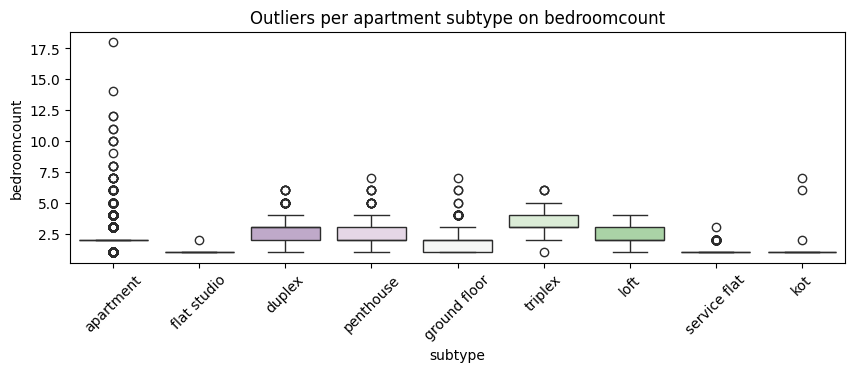

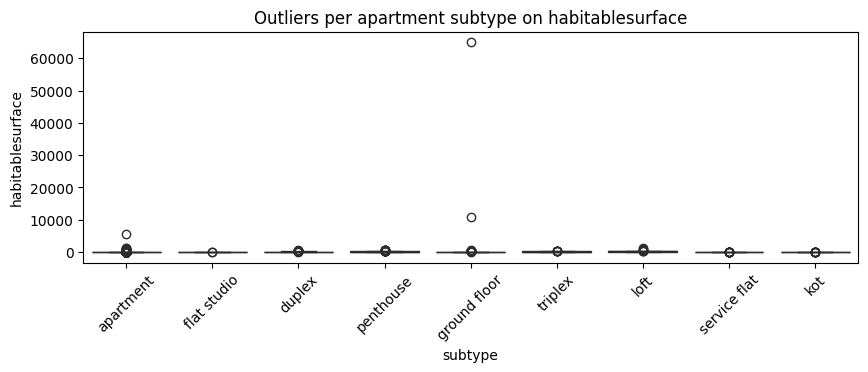

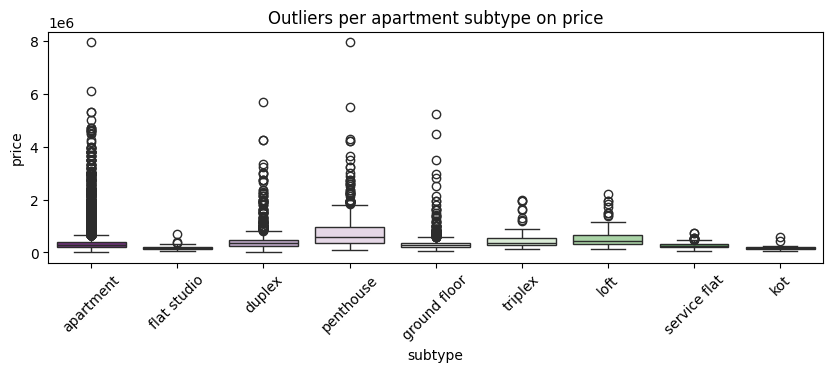

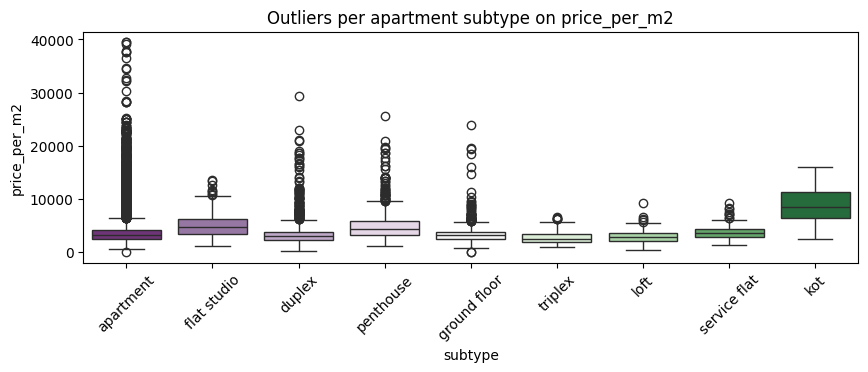

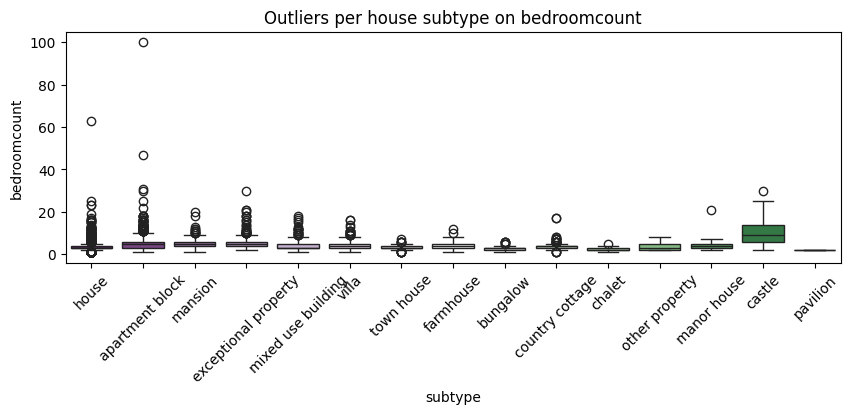

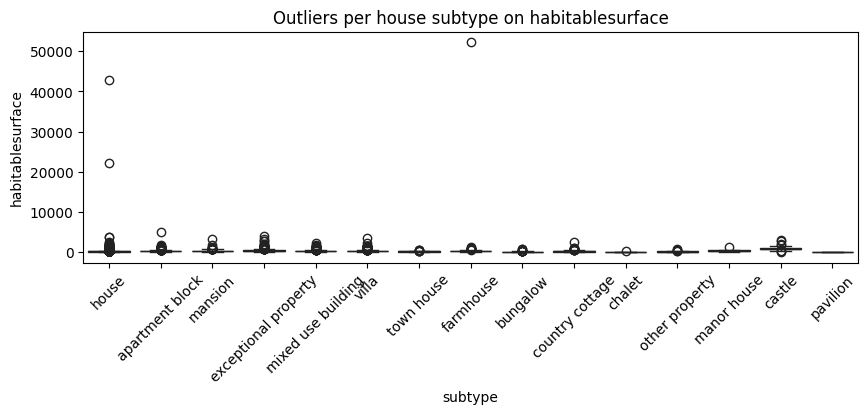

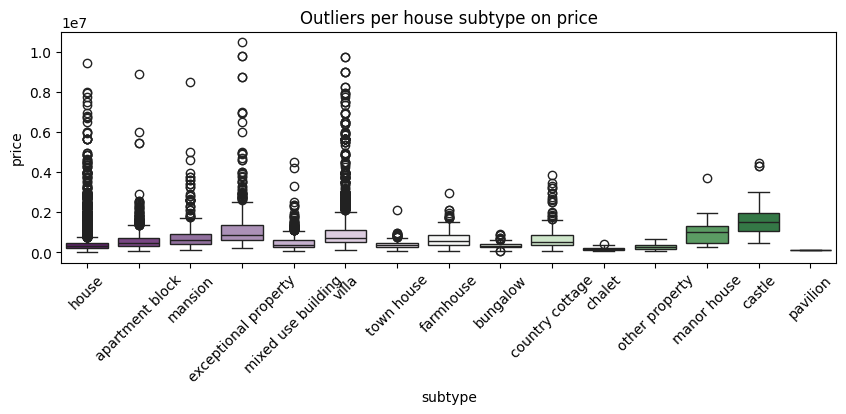

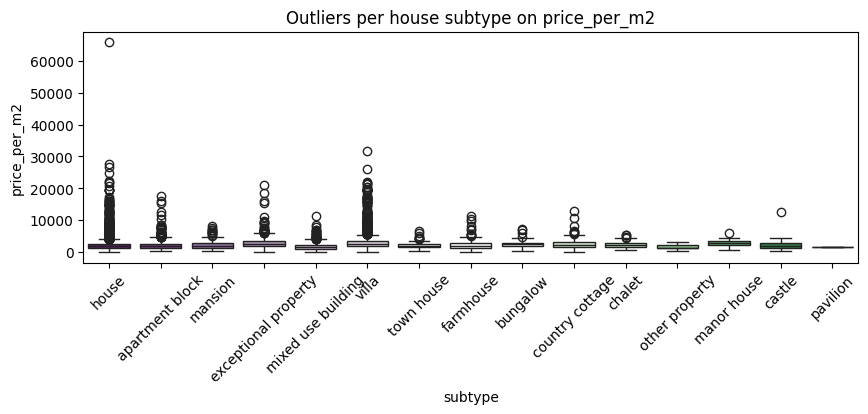

In [4]:
#def show_boxplots():
num_cols_cleaned =['bedroomcount','habitablesurface','price', 'price_per_m2']
list_type =['apartment', 'house']
for lt in list_type:
    for bx in num_cols_cleaned:
        fig, ax = plt.subplots(figsize=(10, 3))
        df1 = df[(df['type'].isin([lt]))]
        #df1 = df.groupby('type')['apartment'].apply(list).reset_index(name='new')
        sns.boxplot(data=df1, x='subtype', y=bx, hue='subtype', width=0.8, palette=sns.color_palette("PRGn", df1['subtype'].nunique()), ax=ax).set_title(f'Outliers per {lt} subtype on {bx}')
        ax.tick_params(axis='x', rotation=45)
        plt.show()

# Statistical outliers identification on subtype and regions
* Focus on identifying the  number of outliers
* Outliers as 2X the diff 75% 25% quantiles
    * Bedrooms: appartmentblock, house subtypes top Wallonia 67, 45 number of outliers
    * Surface: house and villa subtypes with top Flanders 342, 347 number of outliers
    * Price: house, apartment, villa with top Flanders 370, 490, 525 number of outliers
    * Price/m2: apartment, house, villa with top Flanders 1072, 115, 135 number of outliers

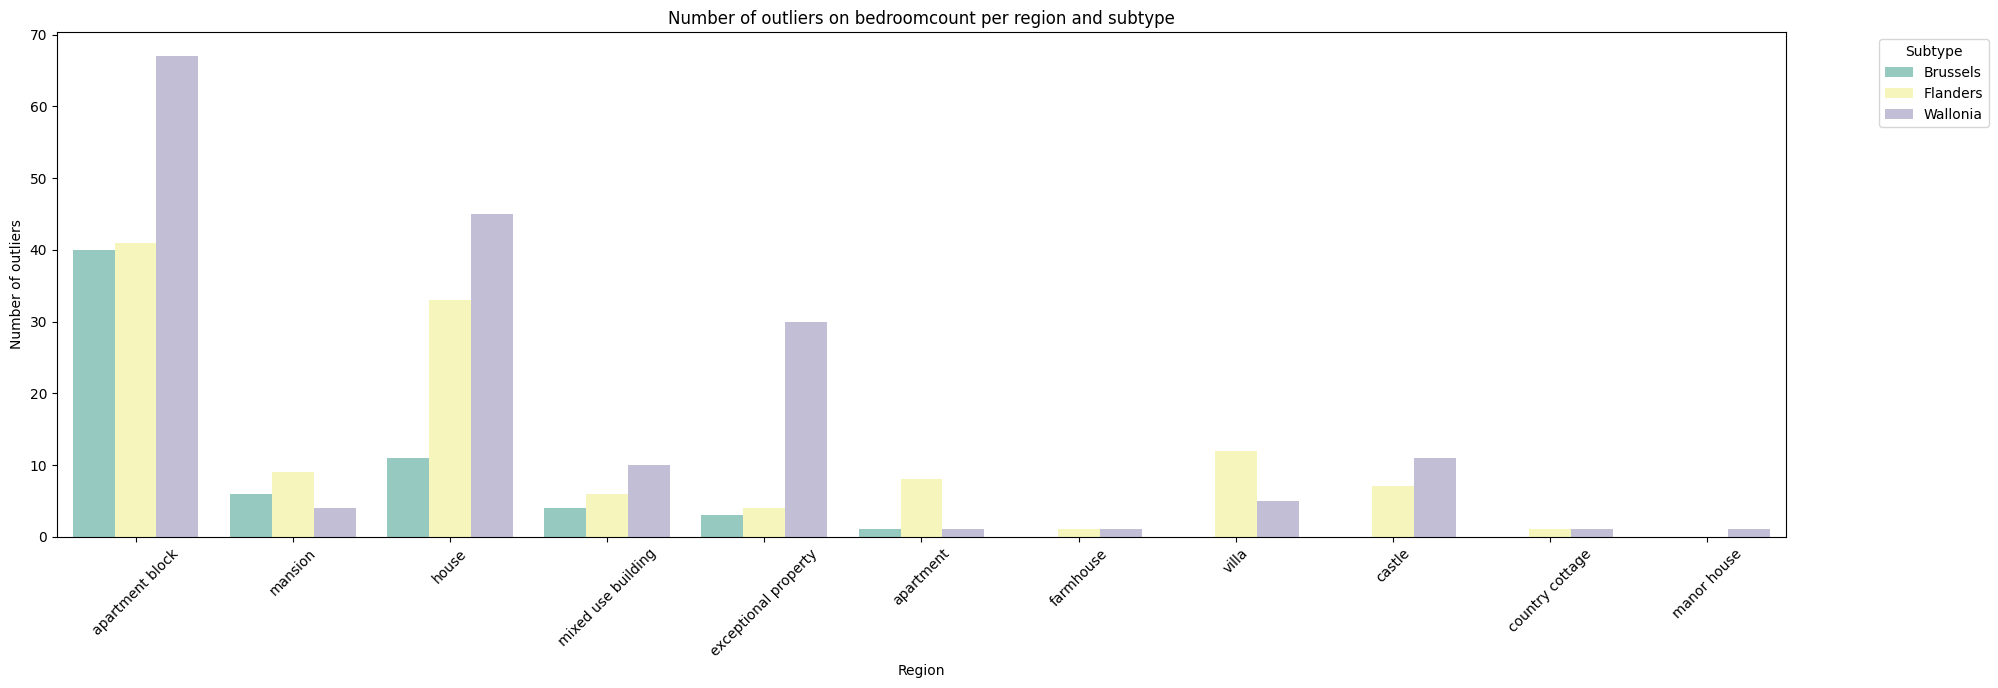

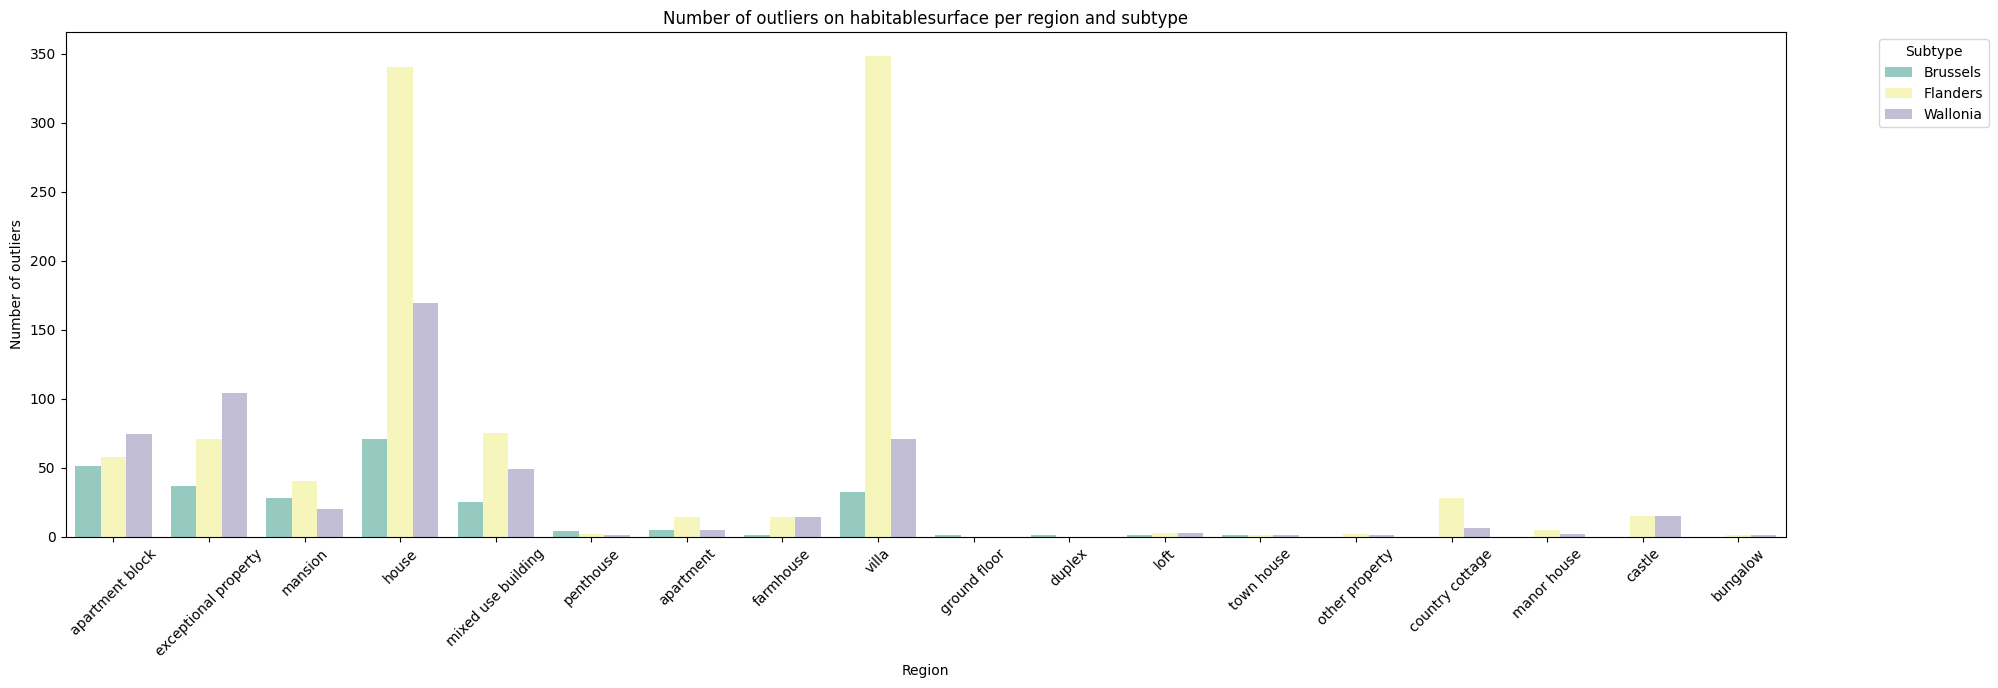

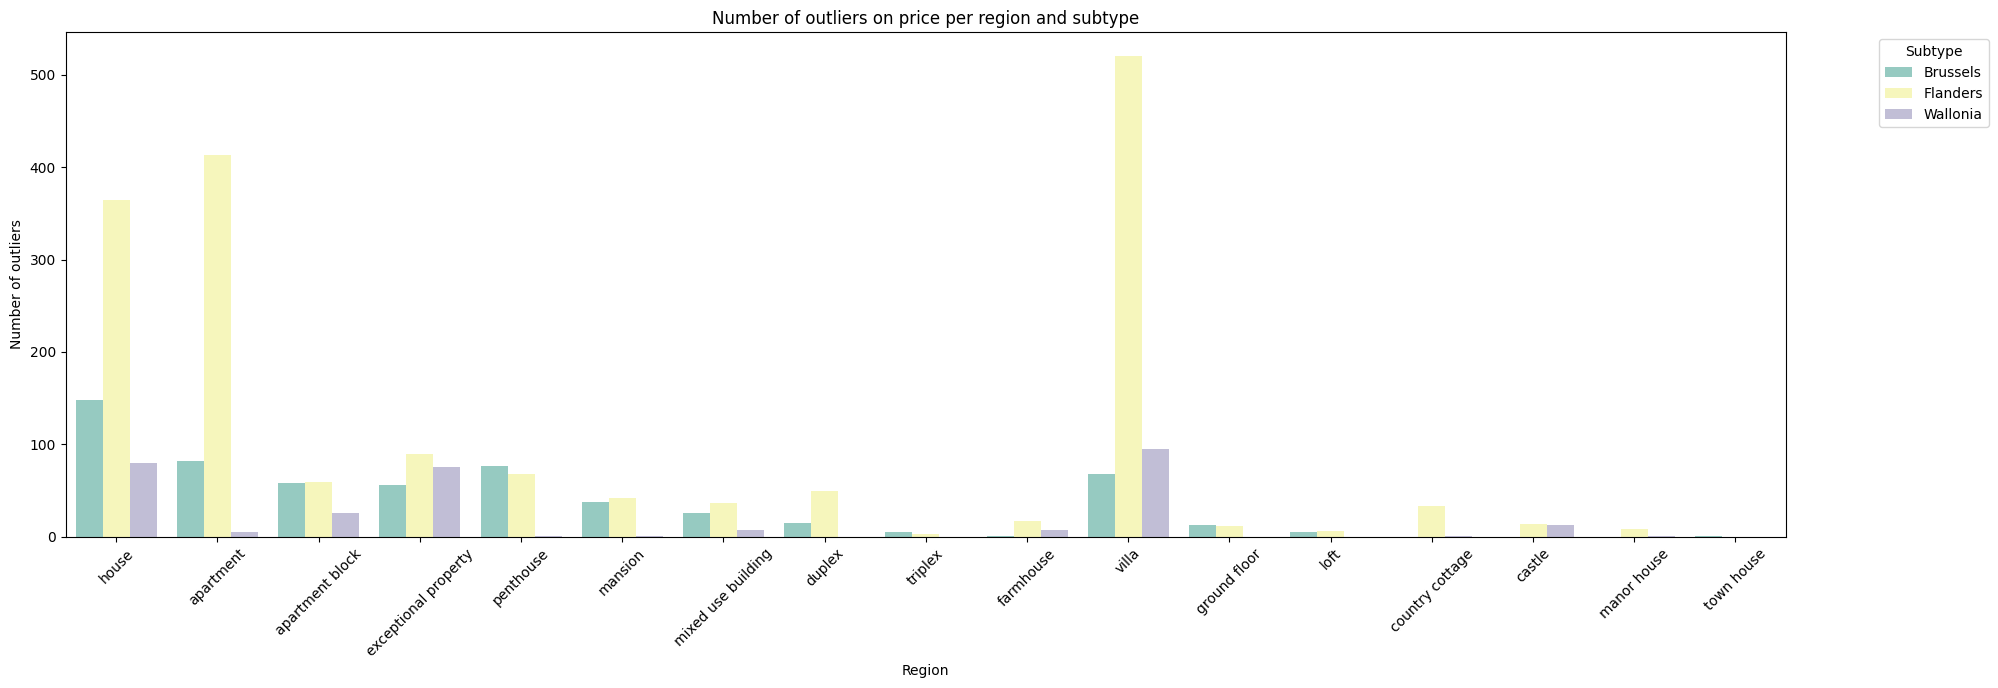

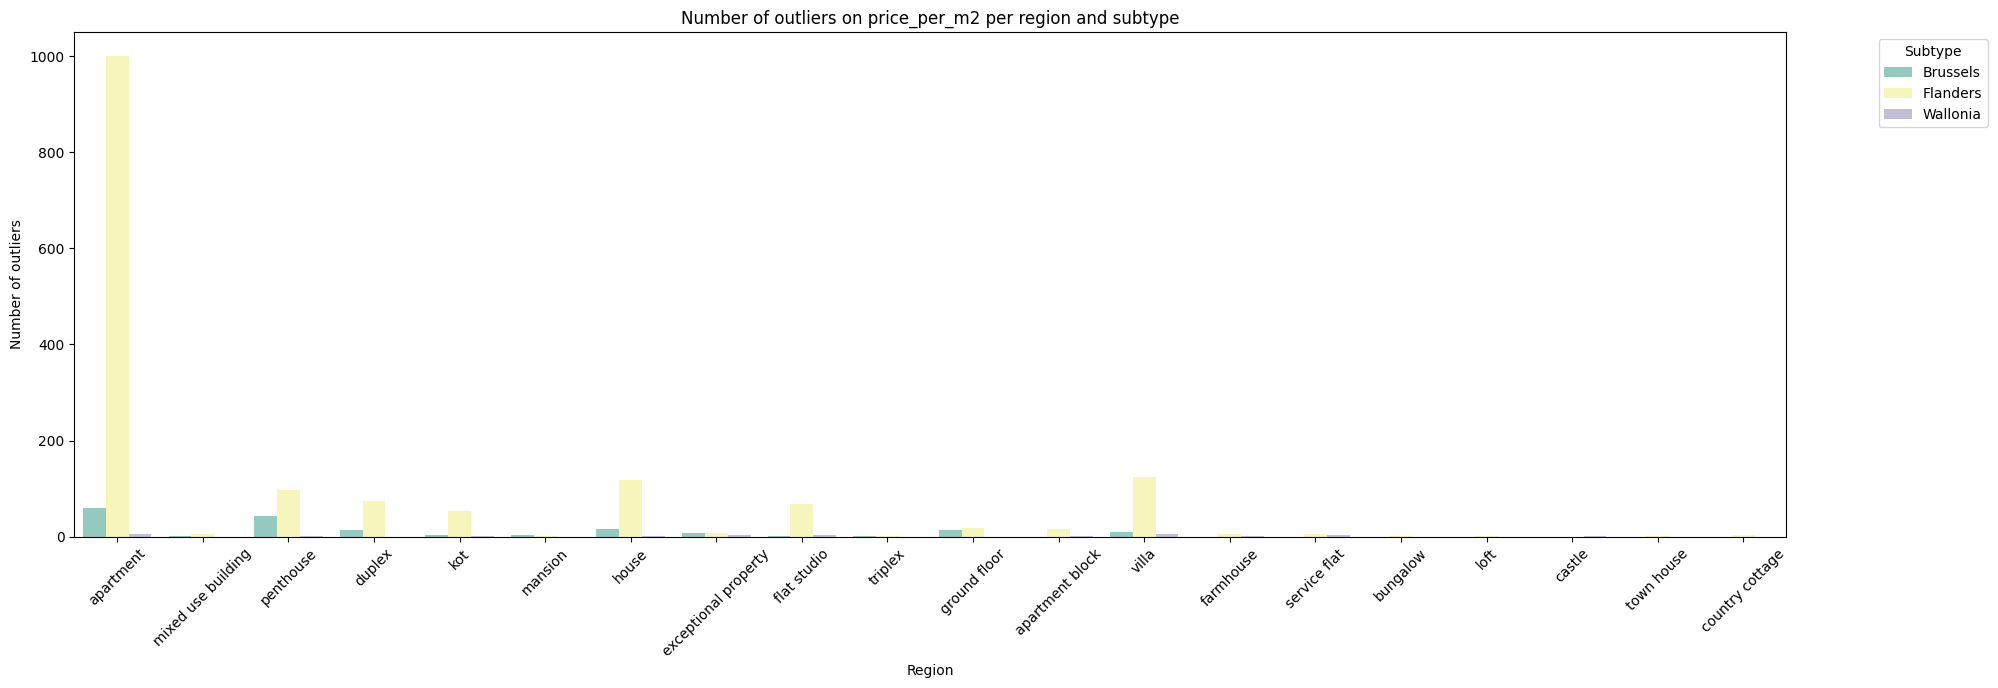

In [9]:
region_values = ['Flanders', 'Wallonia', 'Brussels']

Flanders = 'antwerp|flemish brabant|east flanders|west flanders|limburg'
Wallonia = 'hainaut|liège|luxembourg|namur|walloon brabant'
Brussels = 'brussels'
for cplt in num_cols_cleaned:
    # 75th percentile
    seventy_fifth = df[cplt].quantile(0.75)
    # 25th percentile
    twenty_fifth = df[cplt].quantile(0.25)
    # Interquartile range
    surface_iqr = seventy_fifth - twenty_fifth

    # Upper threshold
    upper = seventy_fifth + (2 * surface_iqr)
    # Lower threshold
    lower = twenty_fifth - (2 * surface_iqr)

    conditions = [
    (df["province"].str.contains(Flanders)),
    (df["province"].str.contains(Wallonia)),
    (df["province"].str.contains(Brussels))]

    df["Regions"] = np.select(conditions, region_values, default="Other")

    #outliers = df[(df[cplt] < lower) | (df[cplt] > upper)]
    outliers_lower = df[(df[cplt] < lower)]
    outliers_upper = df[((df[cplt] > upper))]
    
    #print(outliers[["type", "Regions", "habitablesurface"]].sort_values(by="habitablesurface"))
    #print(outliers.groupby(["Regions", "subtype"]).size())

    #plt.figure(figsize=(10, 6))
    fig2, ax2 = plt.subplots(figsize=(20, 6))
    sns.countplot(data=outliers_upper, x="subtype", hue="Regions", palette="Set3")
    plt.title(f"Number of outliers on {cplt} per region and subtype")
    plt.ylabel("Number of outliers")
    plt.xlabel("Region")
    plt.legend(title="Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    ax2.tick_params(axis='x', rotation=45)
    plt.show()


In [5]:
# dropping extreme values

# capping surface
df = df[
    ((df['type'] == 'apartment') & (df['habitablesurface'] < 5000)) |
    ((df['type'] == 'house') & (df['habitablesurface'] < 10100))]

# capping price
df = df[
    ((df['type'] == 'apartment') & (df['price'] < 5000000))|
    (df['type'] != 'apartment')]

# capping price per m2
df = df[
    ((df['type'] == 'apartment') & (df['price_per_m2'] < 20000))|
    (df['type'] != 'apartment')]

df = df[
    ((df['subtype'] == 'house') & (df['price_per_m2'] < 20000)) |
    (df['subtype'] != 'house')]
    
df = df[
    ((df['subtype'] == 'exceptional property') & (df['price_per_m2'] < 20000)) |
    (df['subtype'] != 'exceptional property')]

df = df[
    ((df['subtype'] == 'villa') & (df['price_per_m2'] < 20000)) |
    (df['subtype'] != 'villa')]

In [6]:
num_cols_cleaned =['bedroomcount','habitablesurface','price', 'price_per_m2']
for cls in num_cols_cleaned:
    p99 = df[cls].quantile(0.99) #here you can adjust the filter
    df_filtered = df[df[cls] <= p99]

In [ ]:
#def show_boxplots():
num_cols_cleaned =['bedroomcount','habitablesurface','price', 'price_per_m2']
list_type =['apartment', 'house']
for lt in list_type:
    for bx in num_cols_cleaned:
        fig, ax = plt.subplots(figsize=(10, 3))
        df1 = df[(df['type'].isin([lt]))]
        #df1 = df.groupby('type')['apartment'].apply(list).reset_index(name='new')
        sns.boxplot(data=df1, x='subtype', y=bx, width=0.8, palette="PRGn", hue='subtype', legend=False,ax=ax).set_title(f'Outliers after caps per {lt}')
        ax.tick_params(axis='x', rotation=45)
        plt.show()

# KDE plot to see the distribution of various non-numerical versus p/m2
* EPC Score distribution tends to higher p/m2, the higher the score
* Penthouse subtype tends to higher p/m2 for apartments
* Villa subtype tends to higher p/m2 for house
* The newer the building conditions, the higher p/m2
* Top distribution on region: 1. Brussels, 2. Flanders, 3. Wallonia

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_17344\3662060785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["epc_category"] = df_filtered["epcscore"].str.lower().str[0]


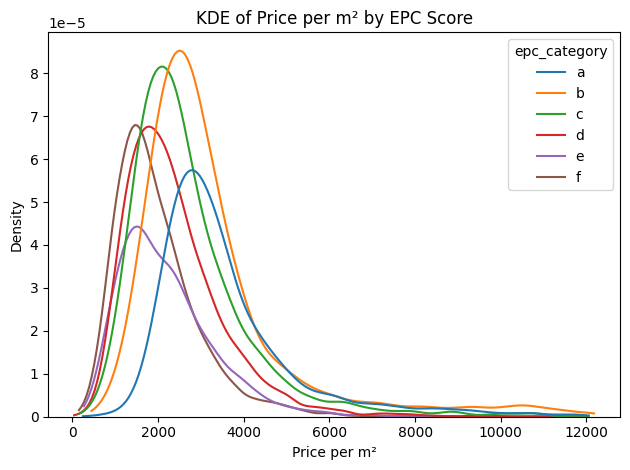

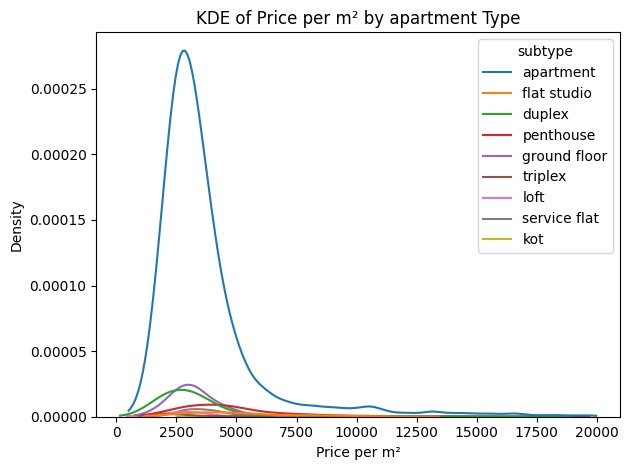

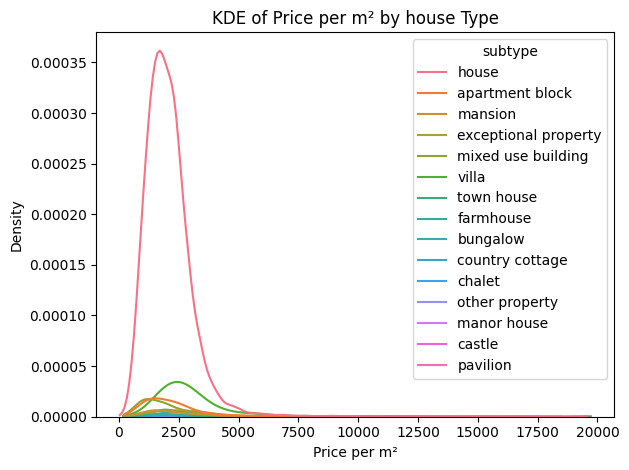

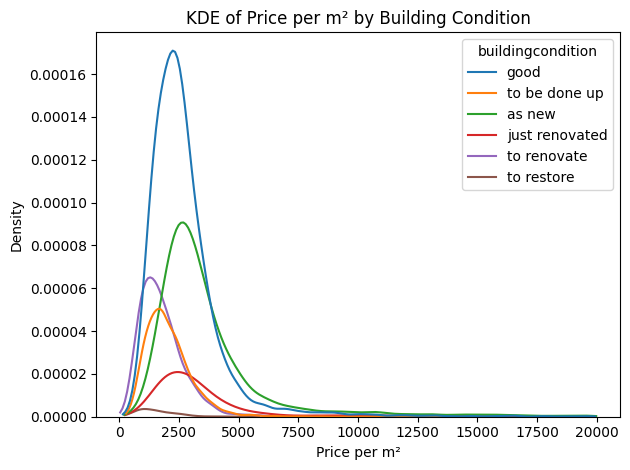

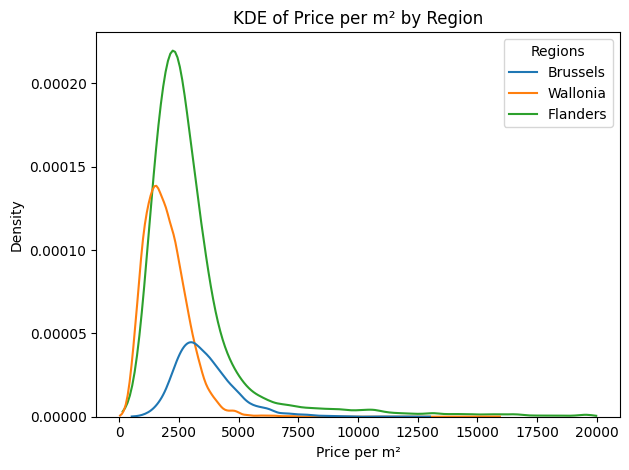

In [11]:
# by EPC Score
# create category column with only first letter
df_filtered["epc_category"] = df_filtered["epcscore"].str.lower().str[0]

sns.kdeplot(
    data=df_filtered,
    x="price_per_m2",
    hue="epc_category",
    hue_order=["a", "b", "c", "d", "e", "f"],
    cut=0
)
plt.title("KDE of Price per m² by EPC Score")
plt.xlabel("Price per m²")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# by subtype 
for lt in list_type:
    df1 = df[(df['type'].isin([lt]))]
    """type_sub_excl_apt_house = ['duplex','ground floor',
                                   'penthouse','flat studio','service flat','loft',
                                   'triplex','kot',
                        'villa','apartment block','mixed use building',
                          'exceptional property','mansion','town house','bungalow',
                          'country cottage','farmhouse','chalet','castle','other property',
                          'manor house','pavilion']                    

    df1 = df1[df1['subtype'].isin(type_sub_excl_apt_house)]"""
    sns.kdeplot(
        data=df1,
        x="price_per_m2",
        hue='subtype',
        cut=0, warn_singular=False
    )
    plt.title(f"KDE of Price per m² by {lt} Type")
    plt.xlabel("Price per m²")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# by building condition
sns.kdeplot(
        data=df,
        x="price_per_m2",
        hue="buildingcondition",
        cut=0
    )
plt.title("KDE of Price per m² by Building Condition")
plt.xlabel("Price per m²")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# by region
sns.kdeplot(
        data=df,
        x="price_per_m2",
        hue="Regions",
        cut=0
    )
plt.title("KDE of Price per m² by Region")
plt.xlabel("Price per m²")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

